# Product Analytics

In [1]:
# Import  the appropriate libraries

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
%matplotlib inline


In [2]:
# import the dataset from UCI machine learning laboratory site. It is an excel file
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [3]:
# Check the shape
df.shape

(541909, 8)

In [4]:
# Use the head function
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Distribution of the Quantity Column

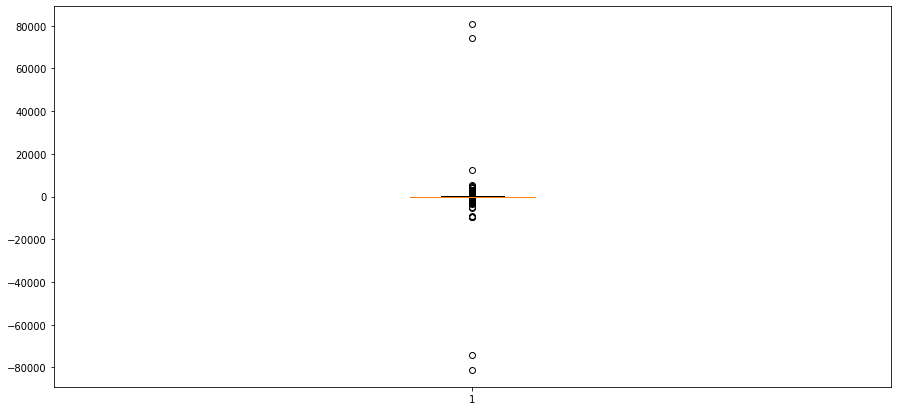

In [5]:
# Create a box plot to identify outliers
fig = plt.figure(figsize =(15, 7)) 
plt.boxplot(df.Quantity)
plt.show() 
#df.boxplot(column='Quantity', return_type='axes');

In [6]:
# Filter out the negative quantity orders
df = df[df['Quantity']>=0]

In [7]:
# Check the shape again
df.shape

(531285, 8)

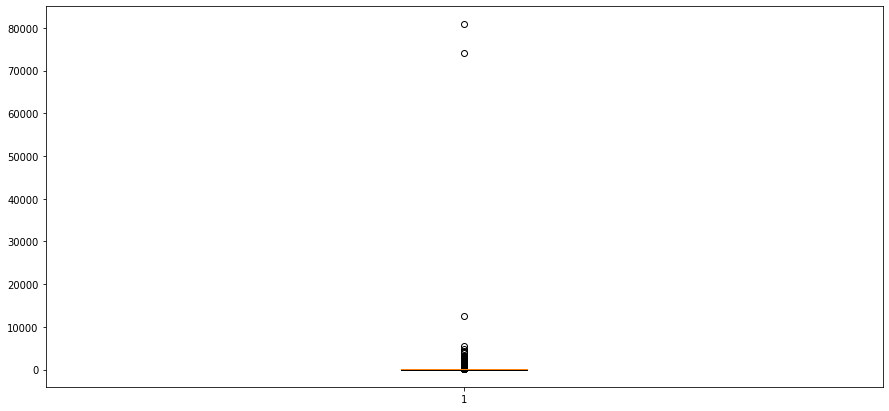

In [8]:
# Create a Box plot without negative quantity
fig = plt.figure(figsize =(15, 7)) 
plt.boxplot(df.Quantity)
plt.show() 

# Time Series Trends
- Number of orders
- Revenue

In [9]:
# resample function resamples the data and converts the data into the desired 
# Summarize the data on a monthly basis 
m_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [10]:
m_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

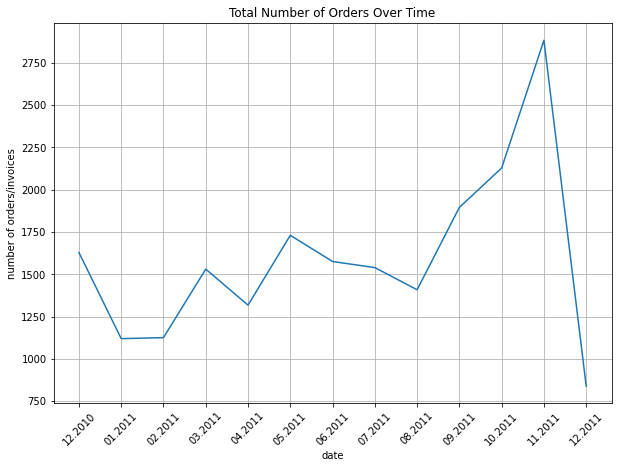

In [11]:
# Create a Line Chart for the data 
ax = pd.DataFrame(m_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df.index], 
    rotation=45
)

plt.show()

In [12]:
# Get all invoice dates from December 1, 2011 
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]



In [13]:
# Print Min and Max dates in that series
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


#### Q. What do you observe?
There is a huge dip in the total order quantity after november, 2011. Moreover the data which we have represents only first 9 days in the month of december, 2011. We do not have full month data.

In [14]:
# Remove the December 2011 data
df = df[df["InvoiceDate"] < '2011-11-30']
# Recalculate the monthly distribution
m1_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
m1_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2770
Freq: M, Name: InvoiceNo, dtype: int64

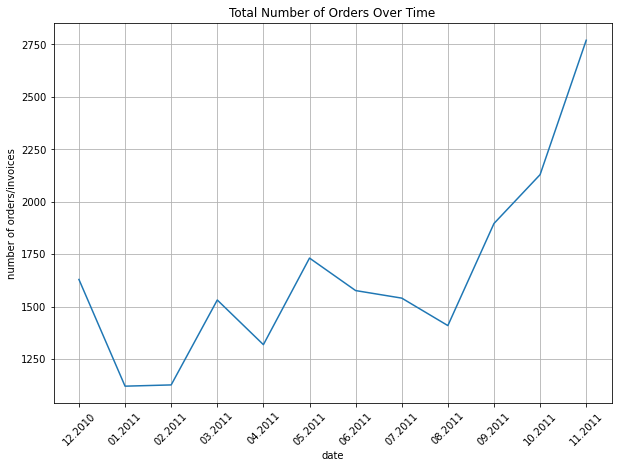

In [15]:
# Create the line chart again
ax = pd.DataFrame(m1_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m1_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m1_orders_df.index], 
    rotation=45
)

plt.show()

In [16]:
# Calculate sales
df['revenue'] = df['Quantity'] * df['UnitPrice']
# Look at monthly revenue data by using sum as an aggregate function
m_revenue_df = df.set_index('InvoiceDate')['revenue'].resample('M').sum()

In [17]:
m_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1449369.370
Freq: M, Name: revenue, dtype: float64

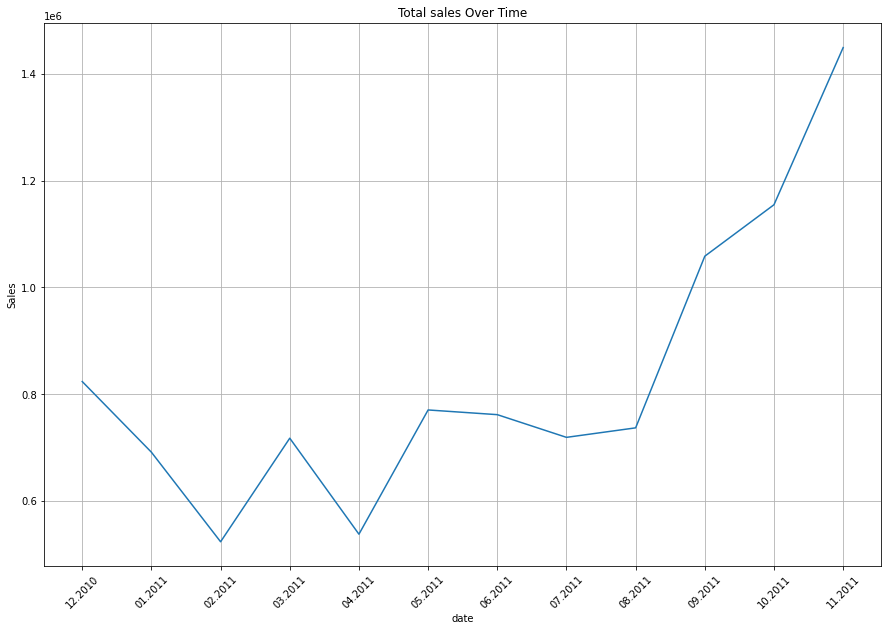

In [18]:
# Create a Line Plot for revenue
ax = pd.DataFrame(m_revenue_df.values).plot(
    grid=True,
    figsize=(15,10),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('Sales')
ax.set_title('Total sales Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_revenue_df.index)), 
    [x.strftime('%m.%Y') for x in m_revenue_df.index], 
    rotation=45
)

plt.show()

#### Q Do you see a similar pattern with the order by month line chart? Comment
Yes, sales by month chart is almost similar to orders by month chart. Since, sales is directly proportion to number of orders.

# Repeat Customers

In [19]:
# Run the head function on  the original dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### Q. What do you notice with the invoice number?
In th first 5 rows the invoice number is same which is 536365. Though the invoice number is same, if we check description or unitprice we can say that under one invoice number there are different orders. This also represents once invoice for once customer.

### Calculate the repeat customers

In [20]:
# Aggregate the raw data for each Invoice No.
invoice_df = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'revenue': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()

In [21]:
invoice_df.head()

,InvoiceNo,InvoiceDate,revenue,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom


In [22]:
# Aggregate by month
#Group by Month and CustomerID. 
# Filter selects customers who have more than one record in the group
# Basically customers with more than one order in a month

m_repeat_customers_df = invoice_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

In [23]:
m_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    516
Freq: M, Name: CustomerID, dtype: int64

In [24]:
# Calculate the unique customers
m_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [25]:
m_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1622
Freq: M, Name: CustomerID, dtype: int64

In [30]:
# Compare the repeat and unique customers by month and calculate percentage by month
m_repeat_percentage = m_repeat_customers_df/m_unique_customers_df*100
m_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    31.812577
Freq: M, Name: CustomerID, dtype: float64

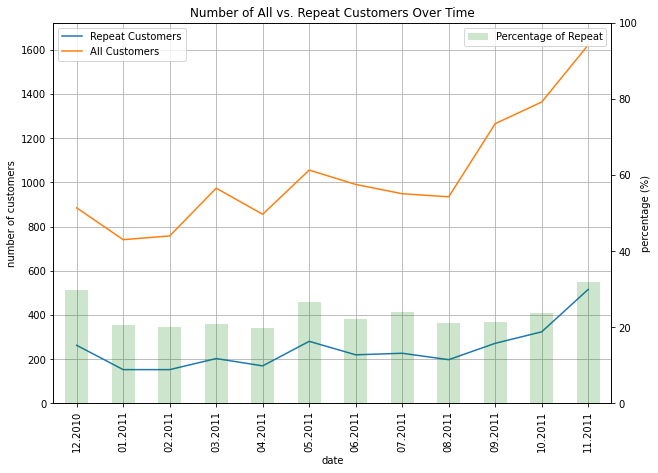

In [27]:
# Visualize thsese two in a dual axis chart

plot1 = pd.DataFrame(m_repeat_customers_df.values).plot(
    figsize=(10,7))

pd.DataFrame(m_unique_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_repeat_percentage.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)

plot1.set_xlabel('date')
plot1.set_ylabel('number of customers')
plot1.set_title('Number of All vs. Repeat Customers Over Time')

plot2.set_ylabel('percentage (%)')

plot1.legend(['Repeat Customers', 'All Customers'])
plot2.legend(['Percentage of Repeat'], loc='upper right')

plot1.set_ylim([0, m_unique_customers_df.values.max()+100])
plot2.set_ylim([0, 100])

plt.xticks(
    range(len(m_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in m_repeat_customers_df.index], 
    rotation=45
)
plt.show()

#### Q. Comment on the distribution

In [36]:
# Calculate Monthly revenue of repeat customers
m_repeat_customers_rev_df = invoice_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['revenue']
m_repeat_customers_rev_df
# Calculate and show the % of revenue for repeat and all customers by month
m_rep_rev_per = m_repeat_customers_rev_df/m_revenue_df*100

InvoiceDate
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.519810
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    43.029595
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696
Freq: M, Name: Sales, dtype: float64

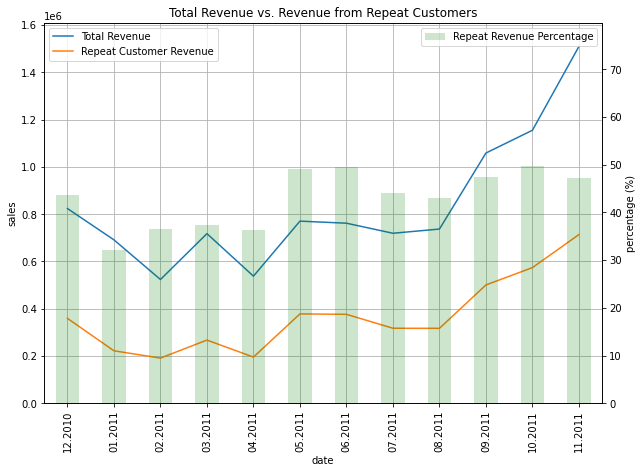

In [31]:
# Plot the  chart for Revenue and % (Dual axis chart)
plot1 = pd.DataFrame(m_repeat_customers_df.values).plot(
    figsize=(10,7))

pd.DataFrame(m_unique_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_repeat_percentage.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)

plot1.set_xlabel('date')
plot1.set_ylabel('number of customers')
plot1.set_title('Number of All vs. Repeat Customers Over Time')

plot2.set_ylabel('percentage (%)')

plot1.legend(['Repeat Customers', 'All Customers'])
plot2.legend(['Percentage of Repeat'], loc='upper right')

plot1.set_ylim([0, m_unique_customers_df.values.max()+100])
plot2.set_ylim([0, 100])

plt.xticks(
    range(len(m_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in m_repeat_customers_df.index], 
    rotation=45
)
plt.show()


#### Q. Comment on the distribution

## Trending Items Over Time (How customers enagage with individual products)

### By Quantity

In [32]:
# Group the datafarme by month with stock code which is really the product ID
m_item_df = pd.DataFrame(df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
                        )

In [34]:
# Lets find out what items were sold the most by quantity on November 30, 2011
# Rank items by the last month sales by sorting by quantity
last_m_sorted_df = m_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()


### By Sales

In [35]:
# Group the datafarme by month with stock code which is really the product ID and 
# calculate the sales

                        )

# Lets find out what items were sold the most by sales on November 30, 2011




In [79]:
# Print both the dataframes


  InvoiceDate StockCode  Quantity
0  2011-11-30     23084     14954
1  2011-11-30     84826     12551
2  2011-11-30     22197     12460
3  2011-11-30     22086      7908
4  2011-11-30    85099B      5909
  InvoiceDate StockCode     Sales
0  2011-11-30       DOT  36905.40
1  2011-11-30     23084  34556.72
2  2011-11-30     22086  28985.04
3  2011-11-30     22197  14195.60
4  2011-11-30    85123A  14136.70


In [37]:
# Use the top 5 items by quantity and find the monthly sales for those items 
m_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum()
)
m_item_df

Sales
InvoiceDate StockCode          
2010-12-31  22086       9225.80
            22197       2630.79
            84826        119.10
            85099B      4019.15
2011-01-31  22086        143.32
            22197       1495.48
            84826        100.80
            85099B      5047.65
2011-02-28  22086         24.95
            22197       2127.00
            84826         17.70
            85099B      5617.24
2011-03-31  22086        232.01
            22197       3032.81
            84826         51.00
            85099B     10118.38
2011-04-30  22086         44.03
            22197       1495.57
            84826          0.85
            85099B      4878.08
2011-05-31  22086         65.19
            22197       5151.63
            23084       2279.57
            85099B      7122.73
2011-06-30  22086        910.88
            22197       1706.91
            23084       3326.87
            84826          3.40
            85099B      7247.98
2011-07-31  22086       1077.93
            22197       1540.00
            23084        668.59
            84826          1.70
            85099B      6253.87
2011-08-31  22086       1334.94
            22197       4133.35
            23084       3533.57
            84826         61.20
            85099B     10796.56
2011-09-30  22086       6006.10
            22197       3607.13
            23084        699.78
            85099B      8884.33
2011-10-31  22086      10031.39
            22197       4813.95
            23084      12256.87
            84826          9.35
            85099B     10485.81
2011-11-30  22086      28985.04
            22197      14195.60
            23084      34556.72
            84826          9.35
            85099B     11641.37

In [38]:
# transform this data into a tabular format where columns are the individual 
# stock codes and the rows are the invoice dates
itmes_df = m_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
itmes_df = itmes_df.reset_index()
itmes_df = itmes_df.set_index('InvoiceDate')
itmes_df.columns = itmes_df.columns.droplevel(0)

In [39]:
itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,9225.80,2630.79,0.00,119.10,4019.15
2011-01-31,143.32,1495.48,0.00,100.80,5047.65
2011-02-28,24.95,2127.00,0.00,17.70,5617.24
2011-03-31,232.01,3032.81,0.00,51.00,10118.38
2011-04-30,44.03,1495.57,0.00,0.85,4878.08
2011-05-31,65.19,5151.63,2279.57,0.00,7122.73
2011-06-30,910.88,1706.91,3326.87,3.40,7247.98
2011-07-31,1077.93,1540.00,668.59,1.70,6253.87
2011-08-31,1334.94,4133.35,3533.57,61.20,10796.56


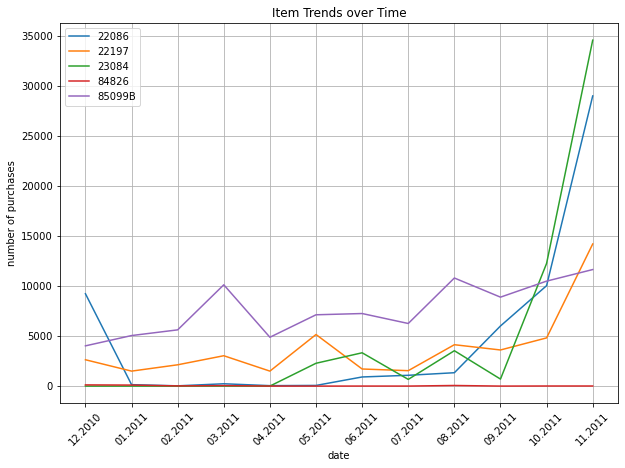

In [40]:
# Time series plot for the top 5 items
plot1 = pd.DataFrame(itmes_df.values).plot(
    figsize=(10,7),
    grid=True,
)

plot1.set_ylabel('number of purchases')
plot1.set_xlabel('date')
plot1.set_title('Item Trends over Time')

plot1.legend(itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(itmes_df.index)), 
    [x.strftime('%m.%Y') for x in itmes_df.index], 
    rotation=45
)

plt.show()

#### Q. What do you observe?

In [41]:
print(last_m_rev_sorted_df.head())

  InvoiceDate StockCode     Sales
0  2011-11-30       DOT  36905.40
1  2011-11-30     23084  34556.72
2  2011-11-30     22086  28985.04
3  2011-11-30     22197  14195.60
4  2011-11-30    85123A  14136.70


In [42]:
# Use the top 5 items by sales and find the monthly sales for those items 


Sales
InvoiceDate StockCode          
2010-12-31  22197       2630.79
            22806         35.40
            85123A     10435.36
            DOT        24671.19
2011-01-31  22197       1495.48
            22806         17.70
            85123A     15223.21
            DOT        13921.82
2011-02-28  22197       2127.00
            22806         17.70
            85123A      5140.11
            DOT        10060.57
2011-03-31  22197       3032.81
            22806        129.69
            85123A      5597.90
            DOT        11829.71
2011-04-30  22197       1495.57
            22806         11.58
            85123A     10017.79
            DOT         7535.38
2011-05-31  22197       5151.63
            22806         29.39
            23084       2279.57
            85123A     11216.42
            DOT        10229.30
2011-06-30  22197       1706.91
            22806          5.79
            23084       3326.87
            85123A      4680.81
            DOT        11848.66
2011-07-31  22197       1540.00
            22806        145.78
            23084        668.59
            85123A      8504.11
            DOT        12841.00
2011-08-31  22197       4133.35
            22806         20.32
            23084       3533.57
            85123A      5620.57
            DOT        13400.52
2011-09-30  22197       3607.13
            22806         91.45
            23084        699.78
            85123A      6957.46
            DOT        15177.40
2011-10-31  22197       4813.95
            22806         20.65
            23084      12256.87
            85123A      4761.95
            DOT        17955.13
2011-11-30  22197      14195.60
            22806         58.89
            23084      34556.72
            85123A     14136.70
            DOT        36905.40

In [43]:
# transform this data into a tabular format where columns are the individual 
# stock codes and the rows are the invoice dates


StockCode,22197,22806,23084,85123A,DOT
InvoiceDate,,,,,
2010-12-31,2630.79,35.40,0.00,10435.36,24671.19
2011-01-31,1495.48,17.70,0.00,15223.21,13921.82
2011-02-28,2127.00,17.70,0.00,5140.11,10060.57
2011-03-31,3032.81,129.69,0.00,5597.90,11829.71
2011-04-30,1495.57,11.58,0.00,10017.79,7535.38
2011-05-31,5151.63,29.39,2279.57,11216.42,10229.30
2011-06-30,1706.91,5.79,3326.87,4680.81,11848.66
2011-07-31,1540.00,145.78,668.59,8504.11,12841.00
2011-08-31,4133.35,20.32,3533.57,5620.57,13400.52


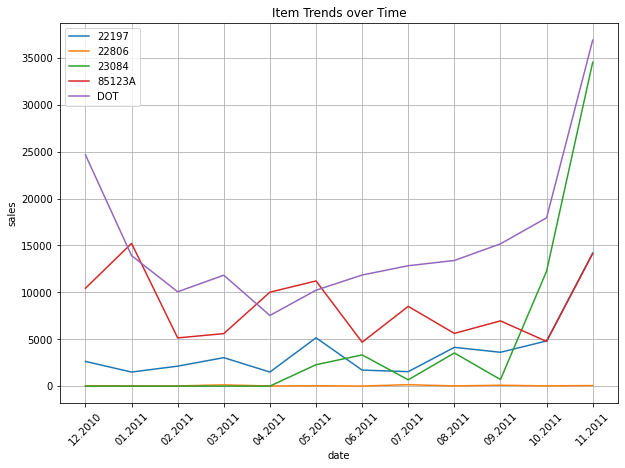

In [44]:
# Time series plot for the top 5 items


#### Q. What do you observe?

In [45]:
# Drop NaN records
df = df[pd.notnull(df['CustomerID'])]

In [46]:
df.shape

(380620, 9)

In [47]:
 # Summarize the data for each order or InvoiceNo

orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
            'Sales': sum,
            'InvoiceDate': max
        })

In [48]:
orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]

## Predict 3 Month Customer Lifetime Value (CLV)

In [80]:
clv_freq = '3M'

In [81]:
# Break down data into 3 months chunk
# https://pbpython.com/pandas-grouper-agg.html more info 
data_df = orders_df.reset_index().groupby([
    'CustomerID',
    pd.Grouper(key='InvoiceDate', freq='3M')
]).agg({
    'Sales': [sum, groupby_mean, groupby_count],
})

data_df.columns = ['_'.join(col) for col in data_df.columns]
data_df = data_df.reset_index()

In [82]:
data_df.head(10)

,CustomerID,InvoiceDate,Sales_sum,Sales_avg,Sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1.0
1,12347.0,2010-12-31,711.79,711.790,1.0
2,12347.0,2011-03-31,475.39,475.390,1.0
3,12347.0,2011-06-30,1018.77,509.385,2.0
4,12347.0,2011-09-30,584.91,584.910,1.0
5,12347.0,2011-12-31,1294.32,1294.320,1.0
6,12348.0,2010-12-31,892.80,892.800,1.0
7,12348.0,2011-03-31,227.44,227.440,1.0
8,12348.0,2011-06-30,367.00,367.000,1.0
9,12348.0,2011-09-30,310.00,310.000,1.0


In [83]:
# Encode the InvoiceDate column
date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)
    )
}

data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

In [105]:
data_df.head()

,CustomerID,InvoiceDate,Sales_sum,Sales_avg,Sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1.0,M_4
1,12347.0,2010-12-31,711.79,711.790,1.0,M_5
2,12347.0,2011-03-31,475.39,475.390,1.0,M_4
3,12347.0,2011-06-30,1018.77,509.385,2.0,M_3
4,12347.0,2011-09-30,584.91,584.910,1.0,M_2


In [85]:
# Transform this data into tabular data, where the rows represent the individual customers and the columns represent each feature using Pivot table
features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M_1'], 
    values=['Sales_sum', 'Sales_avg', 'Sales_count'], 
    columns='M', 
    index='CustomerID'
)

features_df.columns = ['_'.join(col) for col in features_df.columns]

In [86]:
features_df = features_df.fillna(0)

In [87]:
features_df.head()

,Sales_avg_M_2,Sales_avg_M_3,Sales_avg_M_4,Sales_avg_M_5,Sales_count_M_2,Sales_count_M_3,Sales_count_M_4,Sales_count_M_5,Sales_sum_M_2,Sales_sum_M_3,Sales_sum_M_4,Sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00
12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00


In [88]:
# last 3 months 'M1' group and Sales_sum as the target variable as we want to prdict sales for 3 months
response_df = data_df.loc[
    data_df['M'] == 'M_1',
    ['CustomerID', 'Sales_sum']
]

response_df.columns = ['CustomerID', 'CLV_'+'3M']

In [89]:
response_df.head(10)

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67
25,12359.0,2876.85
28,12360.0,1043.78
33,12362.0,2119.85
37,12364.0,299.06
41,12370.0,739.28


In [90]:
 # Combine the 2 sets together
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)

In [91]:
sample_set_df.head()

,Sales_avg_M_2,Sales_avg_M_3,Sales_avg_M_4,Sales_avg_M_5,Sales_count_M_2,Sales_count_M_3,Sales_count_M_4,Sales_count_M_5,Sales_sum_M_2,Sales_sum_M_3,Sales_sum_M_4,Sales_sum_M_5,CustomerID,CLV_3M
NaN,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,0.00
5.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
NaN,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,0.00
NaN,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,0.00
14.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73


## Perform Linear Regression

In [92]:
from sklearn.model_selection import train_test_split

target_var = 'CLV_'+'3M'
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]

x_train, x_test, y_train, y_test = train_test_split(
    sample_set_df[all_features], 
    sample_set_df[target_var], 
    test_size=0.2
)

In [93]:
from sklearn.linear_model import LinearRegression

reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression()

In [94]:
# Calculate the intercept
reg_fit.intercept_

116.19110759690648

In [95]:
# Calculate the coefficient
reg_fit.coef_

array([ 5.51279388e-02, -1.07270541e+00,  1.00727052e-01, -3.22045687e-01,
        8.10078559e+01,  8.40926528e+00, -6.20627099e+01, -4.75439220e+01,
        1.90700093e-01,  5.82359446e-01,  9.66451698e-02,  7.12725517e-01])

In [96]:
coef=pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns =['feature', 'coef']

In [97]:
coef

,feature,coef
0,Sales_avg_M_2,0.055128
1,Sales_avg_M_3,-1.072705
2,Sales_avg_M_4,0.100727
3,Sales_avg_M_5,-0.322046
4,Sales_count_M_2,81.007856
5,Sales_count_M_3,8.409265
6,Sales_count_M_4,-62.062710
7,Sales_count_M_5,-47.543922
8,Sales_sum_M_2,0.190700
9,Sales_sum_M_3,0.582359


## Evaluate the Regression Model performance

In [98]:

train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [99]:
from sklearn.metrics import r2_score, median_absolute_error

In [101]:
print('In-Sample R-Squared: %0.4f' % r2_score(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true=y_test, y_pred=test_preds))

In-Sample R-Squared: 0.8764
Out-of-Sample R-Squared: 0.1245


In [102]:
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

In-Sample MSE: 214.1514
Out-of-Sample MSE: 212.3281


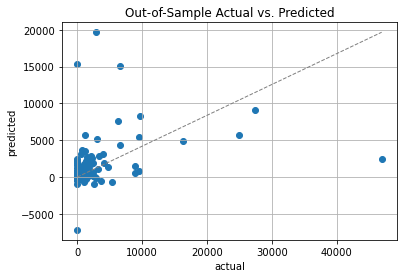

In [103]:
# scatter plot of predicted versus actual.
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()

#### Q. What is the splitting criteria in the code for evaluating the model performance ?
#### Q. What do the regression coefficients indicate? Explain them with reference to the target variable.
#### Q. What is the difference between the in sample R-squared and out of sample R-squared.
#### Q. What does R-squared indicate about model performance?
#### Q. What does MSE indicate about the model performance?
#### Q. Explain the scatter plot.
#### Q. If we change the splitting criteria to 70-30 does it make a huge difference to the performance of the model.


#### Q. Finally, comment on the results of product analytics and  CLV from a marketing perspective